# Configuration and initial Import

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os

project_path = '../'
sys.path.append(project_path)

# Imports

In [4]:
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
sns.set_style("darkgrid")

from exploration.fall_study_stats import TherapeuticStats, PharmaStats, MoleculeStats

In [5]:
molecule_mapping = pd.read_csv("/home/sebiat/stats/2018_03_13/mapping_molecules.csv")

In [10]:
sns.set_palette("muted")
event_type = "achats"
colors_dict = {
    "Antihypertenseurs": sns.color_palette()[0], # Blue
    "Antidepresseurs": sns.color_palette()[1], # Vert
    "Hypnotiques": sns.color_palette()[2], # Rouge
    "Neuroleptiques": sns.color_palette()[3] # Violet
}

# Therapeutic level

In [14]:
therapeutic_level_exposures = spark.read.parquet("/user/sebiat/therapeutic/drug_purchases/data")
therapeutic_stats = TherapeuticStats(therapeutic_level_exposures, colors_dict, event_type)

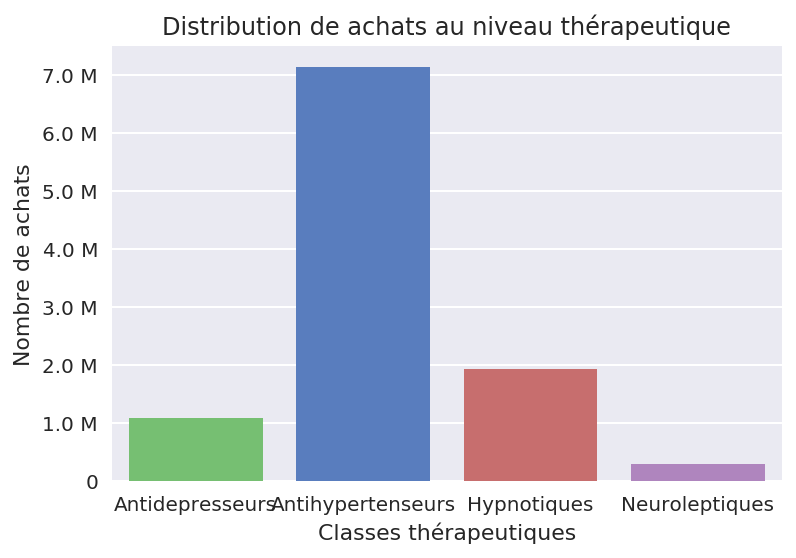

In [15]:
therapeutic_stats.plot()

# Pharmaceutic level

In [16]:
pharmaceutique_level_exposures = spark.read.parquet("/user/sebiat/pharmaceutic/drug_purchases/data")

pharma_stats = PharmaStats(molecule_mapping[["pharmaceutic_family", "therapeutic"]].drop_duplicates(),
                           pharmaceutique_level_exposures, event_type, colors_dict)

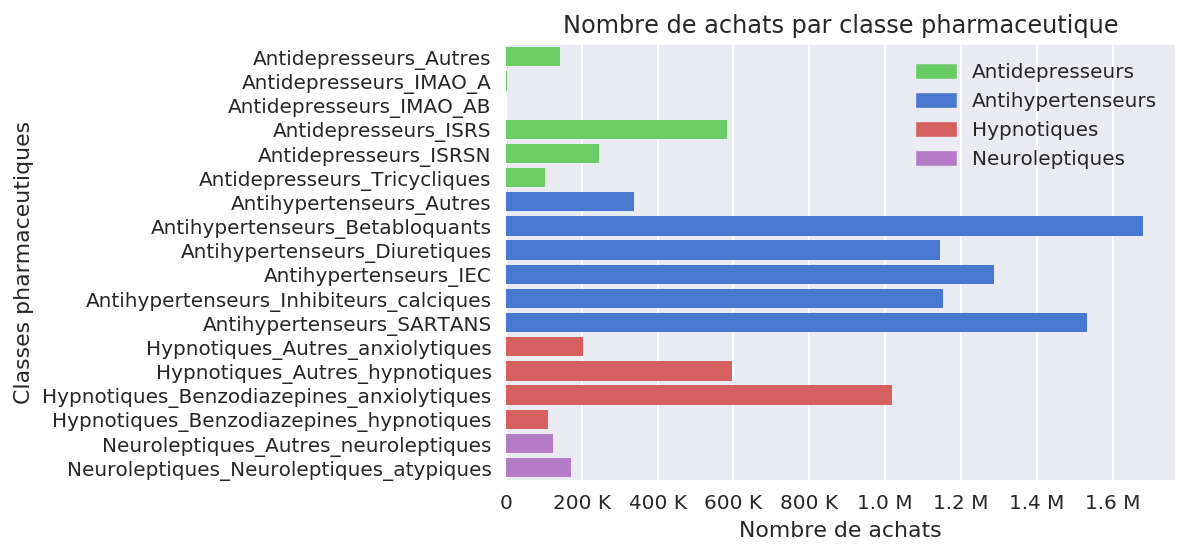

In [17]:
pharma_stats.plot()

# Molecule level

In [18]:
molecule_level_exposures = spark.read.parquet("/user/sebiat/molecules/drug_purchases/data")

molecule_stats = MoleculeStats(molecule_mapping[["pharmaceutic_family", "therapeutic", "molecule"]].drop_duplicates(),
                               molecule_level_exposures, colors_dict, event_type)

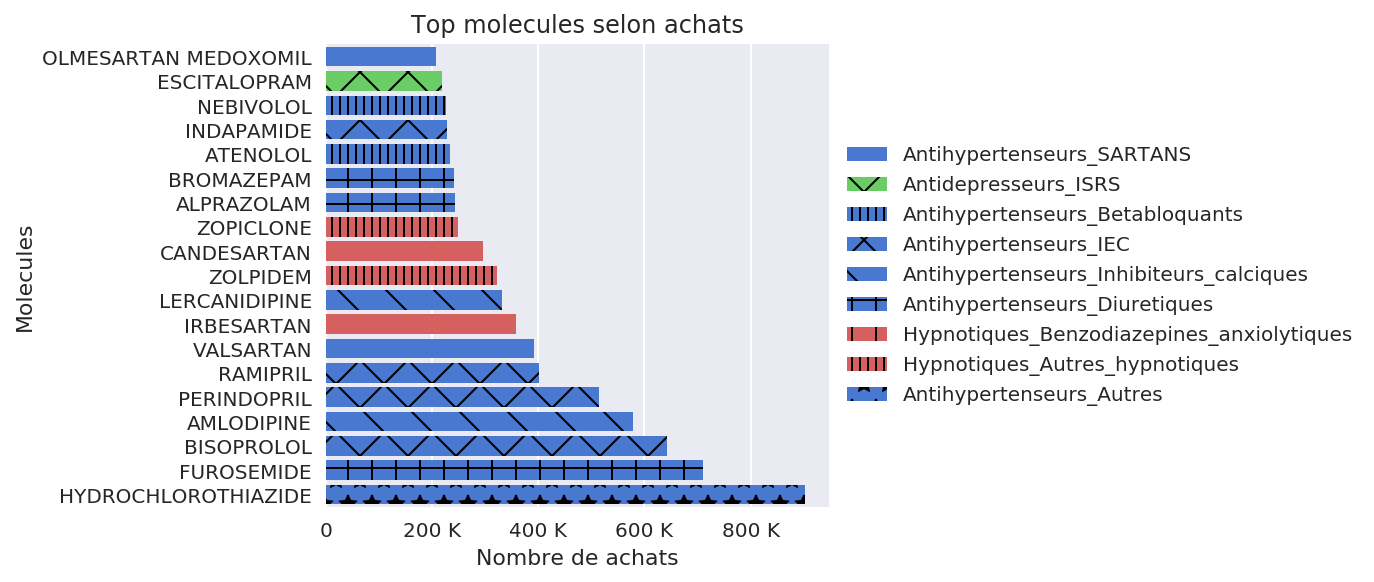

In [19]:
molecule_stats.plot_overall_top_molecules(top=30)

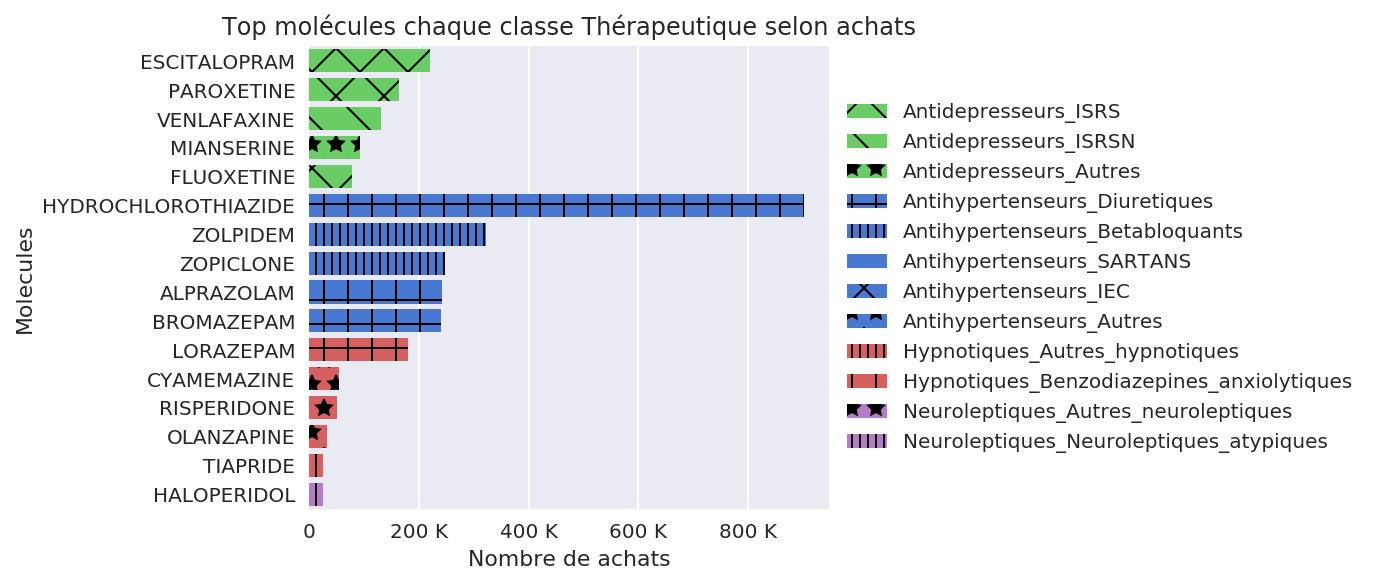

In [20]:
molecule_stats.plot_top_of_therapeutic_classes()